In [3]:
import pandas  as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
df=pd.read_csv("/kaggle/input/uber-fares-dataset/uber.csv")
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [6]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [7]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [8]:
df.isnull().values.sum()

2

In [9]:
dfn=df.dropna()

In [10]:
dfn.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [11]:
dfn=dfn.drop(["key"],axis=1)
dfn=dfn.drop(["Unnamed: 0"],axis=1)

In [12]:
from datetime import datetime
dat=[dates.strip("UTC") for dates in dfn["pickup_datetime"]]
dat=[dates.strip() for dates in dat]
dfn['pickup_datetime']=[datetime.strptime(dates,'%Y-%m-%d %H:%M:%S') for dates in dat]
dfn['pickup_date']=dfn['pickup_datetime'].dt.date

In [13]:
dfn

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date
0,7.5,2015-05-07 19:52:06,-73.999817,40.738354,-73.999512,40.723217,1,2015-05-07
1,7.7,2009-07-17 20:04:56,-73.994355,40.728225,-73.994710,40.750325,1,2009-07-17
2,12.9,2009-08-24 21:45:00,-74.005043,40.740770,-73.962565,40.772647,1,2009-08-24
3,5.3,2009-06-26 08:22:21,-73.976124,40.790844,-73.965316,40.803349,3,2009-06-26
4,16.0,2014-08-28 17:47:00,-73.925023,40.744085,-73.973082,40.761247,5,2014-08-28
...,...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00,-73.987042,40.739367,-73.986525,40.740297,1,2012-10-28
199996,7.5,2014-03-14 01:09:00,-73.984722,40.736837,-74.006672,40.739620,1,2014-03-14
199997,30.9,2009-06-29 00:42:00,-73.986017,40.756487,-73.858957,40.692588,2,2009-06-29
199998,14.5,2015-05-20 14:56:25,-73.997124,40.725452,-73.983215,40.695415,1,2015-05-20


<Axes: >

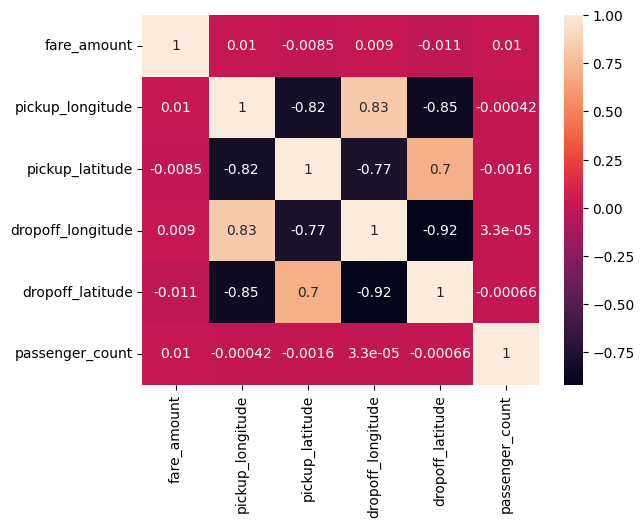

In [18]:
corr=dfn.drop(["pickup_datetime","pickup_date"],axis=1).corr()
sns.heatmap(corr,annot=True)

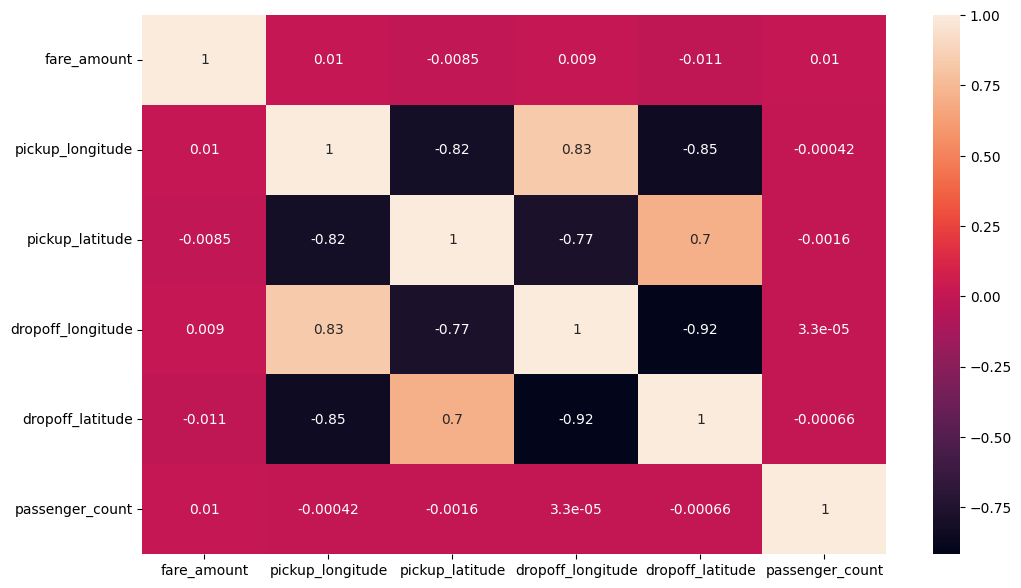

In [19]:
plt.figure(figsize=(12,7))
plot=sns.heatmap(corr,annot=True)
plt.show()

In [20]:
from math import sin,cos, sqrt,atan2

def latlog2distance(lat1,log1,lat2,log2):
    R=6373.0
    lat=lat2-lat1
    log=log2-log1
    a = (sin(lat/2))**2 + cos(lat1) * cos(lat2) * (sin(log/2))**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    distance= R*c
    return distance
    

In [21]:
latlog2distance(52.2296756,21.0122287,52.406374,16.9251681)

5447.055461466734

In [24]:
lat1=dfn["pickup_latitude"].tolist()
log1=dfn["pickup_longitude"].to_list()
lat2=dfn["dropoff_latitude"].to_list()
log2=dfn["dropoff_longitude"].to_list()

In [25]:
distances=[]

for i in range (len(lat1)):
    D=latlog2distance(lat1[i],log1[i],lat2[i],log2[i])
    distances.append(D)

In [26]:
len(distances)

199999

In [27]:
dfn["distance_in_km"]=distances

In [28]:
dfn

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,distance_in_km
0,7.5,2015-05-07 19:52:06,-73.999817,40.738354,-73.999512,40.723217,1,2015-05-07,96.485676
1,7.7,2009-07-17 20:04:56,-73.994355,40.728225,-73.994710,40.750325,1,2009-07-17,140.861283
2,12.9,2009-08-24 21:45:00,-74.005043,40.740770,-73.962565,40.772647,1,2009-08-24,337.688798
3,5.3,2009-06-26 08:22:21,-73.976124,40.790844,-73.965316,40.803349,3,2009-06-26,105.292368
4,16.0,2014-08-28 17:47:00,-73.925023,40.744085,-73.973082,40.761247,5,2014-08-28,324.102311
...,...,...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00,-73.987042,40.739367,-73.986525,40.740297,1,2012-10-28,6.773028
199996,7.5,2014-03-14 01:09:00,-73.984722,40.736837,-74.006672,40.739620,1,2014-03-14,140.279153
199997,30.9,2009-06-29 00:42:00,-73.986017,40.756487,-73.858957,40.692588,2,2009-06-29,901.379916
199998,14.5,2015-05-20 14:56:25,-73.997124,40.725452,-73.983215,40.695415,1,2015-05-20,210.635197


Text(0, 0.5, 'Fare Amount')

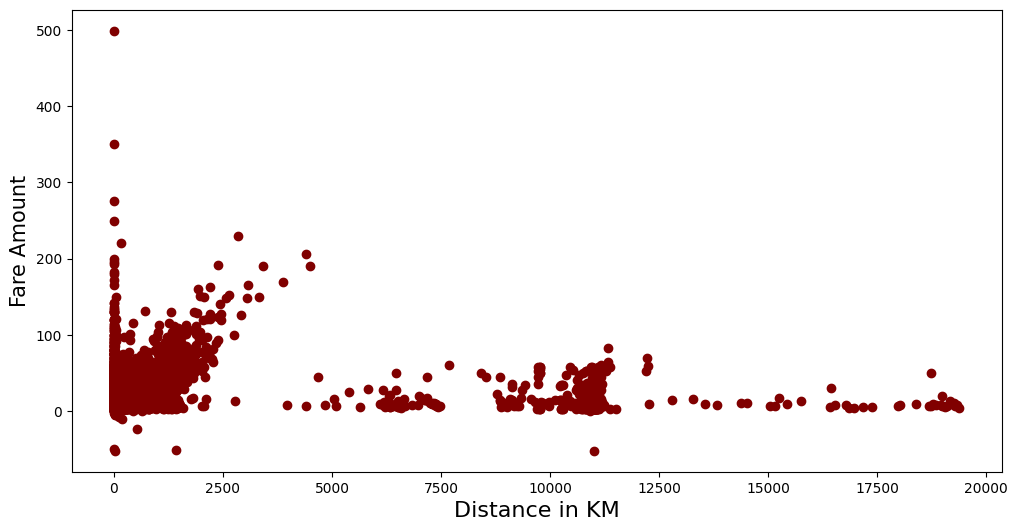

In [29]:
plt.figure(figsize=(12,6))
plt.scatter(y=dfn["fare_amount"],x=dfn["distance_in_km"],c="maroon")
plt.xlabel("Distance in KM",size=16)
plt.ylabel("Fare Amount",size=15)

In [30]:
y=dfn["fare_amount"]

In [44]:
x=dfn.drop(["fare_amount","pickup_datetime","pickup_date"],axis=1)
x

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_in_km
0,-73.999817,40.738354,-73.999512,40.723217,1,96.485676
1,-73.994355,40.728225,-73.994710,40.750325,1,140.861283
2,-74.005043,40.740770,-73.962565,40.772647,1,337.688798
3,-73.976124,40.790844,-73.965316,40.803349,3,105.292368
4,-73.925023,40.744085,-73.973082,40.761247,5,324.102311
...,...,...,...,...,...,...
199995,-73.987042,40.739367,-73.986525,40.740297,1,6.773028
199996,-73.984722,40.736837,-74.006672,40.739620,1,140.279153
199997,-73.986017,40.756487,-73.858957,40.692588,2,901.379916
199998,-73.997124,40.725452,-73.983215,40.695415,1,210.635197


In [45]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=44)

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn import svm

In [47]:
model1=LinearRegression()
model1.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
model2= svm.NuSVR()
model2.fit(xtrain,ytrain)

In [1]:
ypred1=model1.predict(xtest)
ypred1

NameError: name 'model1' is not defined

model2=svm.SVR()
model2.fit(xtrain,ytrain,sample_weight=None)